In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from keras.layers import Dense, Dropout
from PIL import Image
from keras.models import Model
import os
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 12</span>

### Exercise 12.1

Scopo di tale esercitazione è di usare le "deep and convolutional neural network" per il riconoscimento delle immagini fornite dal database MNIST.

Il database di cui sopra fornisce $70000$ immagini di cifre scritte a mano di dimensione $28\times 28$. L'obbiettivo è cercare di associare ad ogni immagine la cifra corrispondente.

####  Deep Neural Nets 

Il database fornisce dati di training (X_train, Y_train) e test (X_test, Y_test). X è un vettore di dimensione (num_samples, 28, 28) di cui ogni cella è un'immagine. Ogni cella di Y è un vettore di tutti zeri tranne per la posizione che corrisponde alla cifra della rispettiva X.

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

#Carico le immagini dal database.
#x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
#y_train, y_test: sono vettori di 9 componenti di tutti zeri tranne la cella la cui pozione corrisponde al numero nell'immagine.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#Le X conservano le immagini del dataset mentre le Y le rispettive cifre rappresentate.

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

60000 train samples
10000 test samples


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


Si definisce ora l'architettura della deep neural network.
Il modello è sequenziale, ovvero i nodi si dispongono su livelli. Un nodo è collegato con tutti quelli del livello precedente e successivo. La rete è caratterizzata da

-  400 neuroni con funzione di attivazione relu con input_shape=(28*28)
-  100 con funzione di attivazione relu
-  10 neuroni, ognuno per ogni cifra

Le reti neurali particolarmete complesse soffrono di overfitting. La funzionalità introdotta per attenuare tale problema prende il nome di Dropout. In questo modo, si seleziona in modo casuale e si spengono delle connessioni tra i nodi con un certo tasso (50%). <br> Questo impedisce che l'accuratezza del modello di training sia troppo diversa da quella di test.

In [5]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


Una volta costruita la rete, è arrivato il momento di definire le funzioni per la fase di training. <br>
In generale, per i problemi di classificazione viene utilizzata la funzione costo crossentropy con l'aggiunta di 'categorical' per la forma dell'output.
Per quanto riguarda l'ottimizzatore, sono stati utlizzati SGD, Adagrad e ADAM per poi confrontare le prestazioni.
L'ultimo metodo da definire è la metrica che quantifica la performance del modello. È stata scelta la funzionalità accuracy. 

In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Nella fase di training si addestra la rete, ovvero si cerca i migliori pesi per ogni nodo.
Si ripete tale procedura per un numero di volte pari alle epoche su dati divisi in sottogruppi di dimensione batch_size.

In [7]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2819 - acc: 0.9173 - val_loss: 0.1158 - val_acc: 0.9619
Epoch 2/5
60000/60000 [==============================] - 214s 4ms/step - loss: 0.1285 - acc: 0.9640 - val_loss: 0.0928 - val_acc: 0.9740
Epoch 3/5
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0978 - acc: 0.9735 - val_loss: 0.0822 - val_acc: 0.9765
Epoch 4/5
60000/60000 [==============================] - 224s 4ms/step - loss: 0.0843 - acc: 0.9772 - val_loss: 0.0849 - val_acc: 0.9785
Epoch 5/5
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0735 - acc: 0.9800 - val_loss: 0.0829 - val_acc: 0.9786


Ora la rete è pronta per poter predirre nuovi dati.
Prima però si vuole capire l'andamento della funzione costo e quanto è accurato il modello in entrambe le fasi.

In [8]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 7s 660us/step

Test loss: 0.08287924475296095
Test accuracy: 0.9786


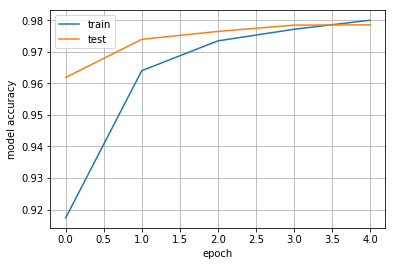

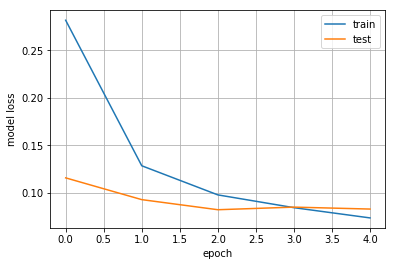

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
#plt.savefig('MA(Adadelta).png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

#plt.savefig('ML(Adadelta).png')
plt.show()

Ho provato a variare il tasso di Dropout per capire l'andamento dell'accuratezza. 
Per tassi alti (> 0.7), si osserva che il test è estremamente più accurato del training. Poche connessioni vengono spente con la conseguenza che si aumenta l'overfitting dei dati.
Per tassi bassi (< 0.3), non vi è una discrepanza così pronunciata tra i due modelli. Questo segnale che l'opzione introdotta funziona nel modo corretto.

Provo a variare il tipo di ottimizzatore lasciando invariati gli altri parametri
- **Stochastic gradient descent optimizer**: l'accuratezza del test è circa del 95%. Per un rate di dropout del 50% si osserva una leggera discrepanza nelle accuratezze delle due fasi; infatti, trascurando le prime epoche, si ha una differenza di circa 0.25 tra i due grafici. Diminuendo il tasso di dropout si osserva che tale discrepanza si riduce.

<img src="./Images/MA(SGD).png" width="400">
<img src="./Images/ML(SGD).png" width="400">

- **Adagrad**: l'accuratezza del test per l'ultima epoca è circa del 97.5%. Per un tasso di dropout pari al 50%, si osserva un minor overfitting rispetto al caso precedente. È più accurata rispetto al caso precedente e la funzione loss rimane più bassa. Tale ottimizzatore è più performante del precedente.

<img src="./Images/MA(Adagrad).png" width="400">
<img src="./Images/ML(Adagrad).png" width="400">

- **Adadelta**: l'accuratezza del test per l'ultima epoca è circa del 98%. L'overfitting è praticamente assente. È l'ottimizzatore più accurato. 

<img src="./Images/MA(Adadelta).png" width="400">
<img src="./Images/ML(Adadelta).png" width="400">

Data una nuova immagine, la rete sarà in grado di identificare la cifra corrispondente?

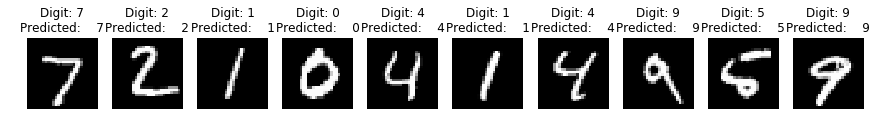

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Esercizio 12.2

#### Convolutional Neural Nets

Le simmetrie presenti nelle immagini non sono sfruttate dalla rete precedente.
Per tale motivo, si introduce la  Convolutional Neural Nets in modo da poter migliorare l'accuratezza del modello attraverso le simmetrie locali tra i pixel e l'invarianza per traslazione.

Precedentemente, ogni campione del database MNIST è stato introdotto come $(28\times 28,)$-long 1d vector. 
Ora, per poter sfruttare tali simmetrie è necessario modificare i dati di training e test.

In [11]:
#keras.backend.image_data_format: Returns the default image data format convention.
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Ho costruito una CNN cosiffatta:
- **Input**: immagine 28x28
- **Convolutional layer** con 6 filtri 5x5
- **MaxPooling 2D** che dimezza entrambe le dimensioni
- **Dropout** con tasso 0.5
- **Convolutional layer** con 16 filtri 5x5
- **MaxPooling 2D** che dimezza entrambe le dimensioni
- **Flatten**
- **Output**: cifra rappresentata nell'immagine in input

In [12]:
def create_CNN():
    # instantiate model
    model = Sequential()
    #Conv2D creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 
    # add first convolutional layer with 10 filters (dimensionality of output space for each filter)
    #kernel_size dimensione dell'output di ogni filtro.
    model.add(Conv2D(6, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    #Scalo di un fattore pool_size le due dimensioni dell'output precedente.
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    
    model.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #ho bidogno di un vettore.
    model.add(Flatten()) 
    # remember to move towards a standard flat layer in the final part of your DNN,
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adadelta',
                  metrics=['accuracy'])
    return model

In [13]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 162s 3ms/step - loss: 11.8844 - acc: 0.2395 - val_loss: 9.8973 - val_acc: 0.3595
Epoch 2/5
60000/60000 [==============================] - 176s 3ms/step - loss: 0.5201 - acc: 0.8881 - val_loss: 0.1255 - val_acc: 0.9605
Epoch 3/5
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2059 - acc: 0.9374 - val_loss: 0.1100 - val_acc: 0.9658
Epoch 4/5
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1768 - acc: 0.9460 - val_loss: 0.0943 - val_acc: 0.9698
Epoch 5/5
10000/10000 [==============================] - 14s 1ms/step

Test loss: 0.07394986650370992
Test accuracy: 0.9751


Adesso valuto la funzione costo e l'accuratezza del modello.

In [14]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 12s 1ms/step

Test loss: 0.07394986650370992
Test accuracy: 0.9751


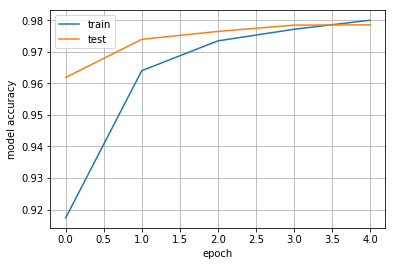

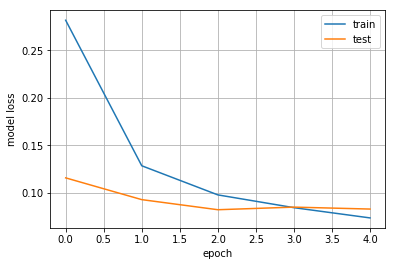

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.savefig('MA(Adadelta).png')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.savefig('ML(Adadelta).png')
plt.show()

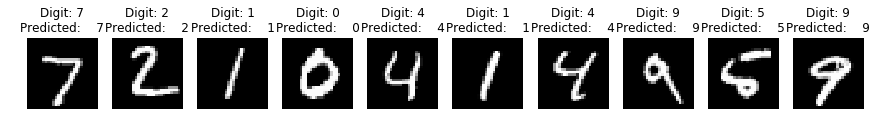

In [16]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Si osserva che le capacità predittive sono ottime.

### Esercizio 12.3

Sono state create 10 immagini ciascuna delle quali rappresenta una cifra. Verranno utilizzate per testare la capacità predittiva della rete. 

Image size: 28x28


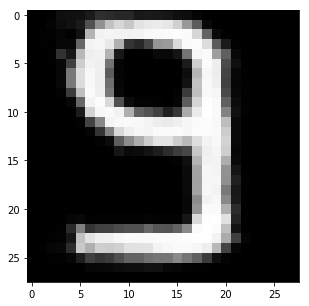

(28, 28)


In [31]:
digit_filename = "./Cifre/9.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

Riuscirà la rete a riconoscere la cifra?

(28, 28)
(1, 784)


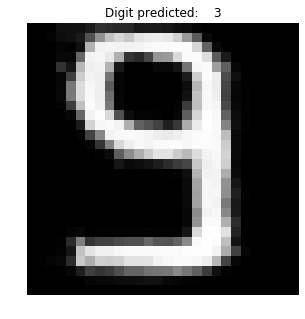

In [32]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

Alcune immagini non vengono identificate nel modo corretto. Questo è dovuto probabilmente all'importante discrepanza tra le mie immagini e quelle fornite. Il 4 è disegnato in modo diverso quindi non ci si può aspettare una ragionevole capacità predittiva. È curioso che non riesca a capire la cifra dell'immagine 0, è la più semplice!

In [33]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d_1
1 max_pooling2d_1
2 dropout_2
3 conv2d_2
4 max_pooling2d_2
5 flatten_1
6 dense_4


Mostro i filtri utilizzati

(5, 5, 1, 6)


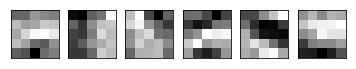

In [34]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

e le immagini processate

In [42]:
test_index = 0
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

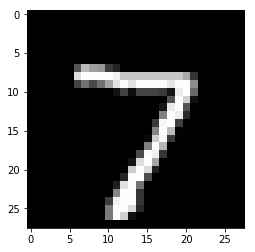

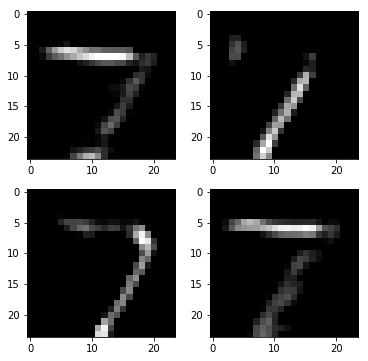

In [44]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 2, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer